# Effective Pandas
https://www.youtube.com/watch?v=UURvPeczxJI

### Setup


In [107]:
%matplotlib inline
from IPython.display import display
import numpy as np 
import pandas as pd 
pd.options.display.min_rows = 20
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')


In [4]:
pd.__version__

'1.1.1'

## Load Data

In [6]:
autos = pd.read_csv('./data/vehicles.csv.zip')

In [7]:
autos.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [8]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [9]:
autos.dtypes # how did pandas load the data

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
city08U       float64
cityA08         int64
cityA08U      float64
cityCD        float64
cityE         float64
               ...   
mfrCode        object
c240Dscr       object
charge240b    float64
c240bDscr      object
createdOn      object
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [10]:
autos.memory_usage(deep=True)

Index             128
barrels08      329152
barrelsA08     329152
charge120      329152
charge240      329152
city08         329152
city08U        329152
cityA08        329152
cityA08U       329152
cityCD         329152
               ...   
mfrCode       1605736
c240Dscr      1319907
charge240b     329152
c240bDscr     1320061
createdOn     3497240
modifiedOn    3497240
startStop     1562048
phevCity       329152
phevHwy        329152
phevComb       329152
Length: 84, dtype: int64

In [11]:
autos.memory_usage(deep=True).sum()

68383393

In [14]:
# select a subset of the rows
cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr','fuelCost08','make','model','trany','range','createdOn','year']

In [15]:
autos[cols].dtypes

city08          int64
comb08          int64
highway08       int64
cylinders     float64
displ         float64
drive          object
eng_dscr       object
fuelCost08      int64
make           object
model          object
trany          object
range           int64
createdOn      object
year            int64
dtype: object

In [17]:
autos[cols].memory_usage(deep=True).sum()


19647323

## Ints

In [18]:
autos[cols].select_dtypes(int).describe()

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [19]:
# chaining
(autos[cols]
 .select_dtypes(int)
 .describe()
 )
 # count is # of non missing values in pandas

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [24]:
# can comb08 be int8 instead of int64
display(np.iinfo(np.int8))
display(np.iinfo(np.int16))

iinfo(min=-128, max=127, dtype=int8)

iinfo(min=-32768, max=32767, dtype=int16)

In [26]:
# chaining
(autos[cols]
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16'})
 .select_dtypes([int, 'int8'])
 .describe()
)

,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000
mean,24.504667,2362.335942,0.793506,2001.535266
std,7.730364,654.981925,13.041592,11.142414
min,9.000000,500.000000,0.000000,1984.000000
25%,20.000000,1900.000000,0.000000,1991.000000
50%,24.000000,2350.000000,0.000000,2002.000000
75%,28.000000,2700.000000,0.000000,2011.000000
max,124.000000,7400.000000,370.000000,2020.000000


In [28]:
# chaining
# use 'integer so see all int-like columns
(autos[cols]
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16'})
 .select_dtypes(['integer'])
 .describe()
)

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [30]:
# use 'integer so see all int-like columns
(autos[cols]
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16'})
 .memory_usage(deep=True)
 .sum()
) # was 19,647,323, saved around 1MB

18865587

## Floats

In [31]:
(
    autos[cols]
    .select_dtypes('float')
)

,cylinders,displ
0,4.0,2.0
1,12.0,4.9
2,4.0,2.2
3,8.0,5.2
4,4.0,2.2
5,4.0,1.8
6,4.0,1.8
7,4.0,1.6
8,4.0,1.6
9,4.0,1.8


In [32]:
autos.cylinders.describe()

count    40938.000000
mean         5.717084
std          1.755517
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64

In [33]:
# missing values
autos.cylinders.value_counts(dropna=False)

4.0     15938
6.0     14284
8.0      8801
5.0       771
12.0      626
3.0       279
NaN       206
10.0      170
2.0        59
16.0       10
Name: cylinders, dtype: int64

In [34]:
(
    autos[cols]
    .query('cylinders.isna()')
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,NaN,NaN,NaN,NaN,800,Nissan,Altra EV,NaN,90,Tue Jan 01 00:00:00 EST 2013,2000
7139,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2000
8143,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2001
8144,74,65,58,NaN,NaN,NaN,NaN,1000,Ford,Th!nk,NaN,29,Tue Jan 01 00:00:00 EST 2013,2001
8146,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,NaN,NaN,NaN,NaN,900,Nissan,Hyper-Mini,NaN,33,Tue Jan 01 00:00:00 EST 2013,2001
9212,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2002
9213,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2002
10329,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2003
21413,22,24,28,NaN,NaN,4-Wheel Drive,NaN,1750,Subaru,RX Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985


In [37]:
# chaining - add cylinders and displ columns
(
    autos[cols]
    .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
        displ=autos.displ.fillna(0))
    .astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
        'fuelCost08':'int16','range':'int16','year':'int16'})
    .describe()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.688460,3.277904,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.797009,1.373415,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,0.000000,0.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,2.200000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,3.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,4.300000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,8.400000,7400.000000,370.000000,2020.000000


In [39]:
autos[cols].describe()

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,40938.000000,40940.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.717084,3.294238,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.755517,1.357151,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,2.000000,0.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,2.200000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,3.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,4.300000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,8.400000,7400.000000,370.000000,2020.000000


In [40]:
#use this to inspect float sizes
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [41]:
(
    autos[cols]
    .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
        displ=autos.displ.fillna(0).astype('float16'))
    .astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
        'fuelCost08':'int16','range':'int16','year':'int16'})
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4,2.000000,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12,4.898438,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4,2.199219,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8,5.199219,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
5,21,22,24,4,1.799805,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
6,22,25,29,4,1.799805,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
7,23,24,26,4,1.599609,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
8,23,26,31,4,1.599609,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
9,23,25,30,4,1.799805,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1993


In [42]:
(
    autos[cols]
    .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
        displ=autos.displ.fillna(0).astype('float16'))
    .astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
        'fuelCost08':'int16','range':'int16','year':'int16'})
    .memory_usage(deep=True)
    .sum()
)

17590123

## Objects

In [43]:
(
    autos[cols]
    .select_dtypes(object)
)

,drive,eng_dscr,make,model,trany,createdOn
0,Rear-Wheel Drive,(FFS),Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
1,Rear-Wheel Drive,(GUZZLER),Ferrari,Testarossa,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
2,Front-Wheel Drive,(FFS),Dodge,Charger,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
3,Rear-Wheel Drive,NaN,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
4,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",Subaru,Legacy AWD Turbo,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
5,Front-Wheel Drive,(FFS),Subaru,Loyale,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
6,Front-Wheel Drive,(FFS),Subaru,Loyale,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
7,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
8,Front-Wheel Drive,(FFS),Toyota,Corolla,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
9,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 4-spd,Tue Jan 01 00:00:00 EST 2013


In [44]:
# cardinality - how many unique values there are


In [45]:
# looks categorical
autos.drive.value_counts(dropna=False)

Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                3015
4-Wheel Drive                  1460
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: drive, dtype: int64

In [49]:
# where are the values missing for drive?
(autos[cols]
.query('drive.isna()'))

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,NaN,NaN,NaN,NaN,800,Nissan,Altra EV,NaN,90,Tue Jan 01 00:00:00 EST 2013,2000
8144,74,65,58,NaN,NaN,NaN,NaN,1000,Ford,Th!nk,NaN,29,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,NaN,NaN,NaN,NaN,900,Nissan,Hyper-Mini,NaN,33,Tue Jan 01 00:00:00 EST 2013,2001
18217,18,21,25,4.0,2.0,NaN,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18218,20,22,26,4.0,1.5,NaN,(FFS),1900,Bertone,X1/9,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18219,13,15,20,8.0,5.7,NaN,(350 V8) (FFS),2800,Chevrolet,Corvette,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18220,13,15,20,8.0,5.7,NaN,(350 V8) (FFS),2800,Chevrolet,Corvette,Manual 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18221,15,17,20,6.0,3.0,NaN,"(FFS,TRBO)",2500,Nissan,300ZX,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18222,16,18,20,6.0,3.0,NaN,(FFS),2350,Nissan,300ZX,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18223,16,18,22,6.0,3.0,NaN,"(FFS,TRBO)",2350,Nissan,300ZX,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984


In [52]:
# drive and make (in .astype) to category
(autos[cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
 displ=autos.displ.fillna(0).astype('float16'),
 drive=autos.drive.fillna('Other').astype('category'))
.astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
        'fuelCost08':'int16','range':'int16','year':'int16',
        'make': 'category'})
    .memory_usage(deep=True)
    .sum()
)

12094247

In [56]:
# let's inspect trany
# seems to represent two pieces of data, automatic/manual and gear speds
autos.trany.value_counts(dropna=False)

Automatic 4-spd                     11047
Manual 5-spd                         8361
Automatic 3-spd                      3151
Automatic (S6)                       3106
Manual 6-spd                         2757
Automatic 5-spd                      2203
Automatic (S8)                       1665
Automatic 6-spd                      1619
Manual 4-spd                         1483
Automatic (S5)                        833
Automatic (variable gear ratios)      826
Automatic 7-spd                       724
Automatic 8-spd                       433
Automatic (AM-S7)                     424
Automatic (S7)                        327
Automatic 9-spd                       293
Automatic (AM7)                       245
Automatic (S4)                        233
Automatic (AV-S6)                     208
Automatic (A1)                        201
Automatic (AM6)                       151
Automatic (AV-S7)                     139
Automatic (S10)                       124
Automatic (AM-S6)                 

In [61]:
# add automatic, speeds from trany, then drop trany
(autos[cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
 displ=autos.displ.fillna(0).astype('float16'),
 drive=autos.drive.fillna('Other').astype('category'),
 automatic=autos.trany.str.contains('Auto'),
 speeds=autos.trany.str.extract('r(\d)+').fillna('20').astype('int8')
 )
.astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
        'fuelCost08':'int16','range':'int16','year':'int16',
        'make': 'category'})
.drop(columns=['trany'])
.memory_usage(deep=True)
.sum()
)

10632019

## Dates

In [63]:
# add createdOn
(autos[cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
 displ=autos.displ.fillna(0).astype('float16'),
 drive=autos.drive.fillna('Other').astype('category'),
 automatic=autos.trany.str.contains('Auto'),
 speeds=autos.trany.str.extract('r(\d)+').fillna('20').astype('int8'), createdOn=pd.to_datetime(autos.createdOn).dt.tz_localize('America/New_York')
 )
.astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
        'fuelCost08':'int16','range':'int16','year':'int16',
        'make': 'category'})
.drop(columns=['trany'])
.memory_usage(deep=True)
.sum()
)

7463931

In [64]:
autos[cols].createdOn

0        Tue Jan 01 00:00:00 EST 2013
1        Tue Jan 01 00:00:00 EST 2013
2        Tue Jan 01 00:00:00 EST 2013
3        Tue Jan 01 00:00:00 EST 2013
4        Tue Jan 01 00:00:00 EST 2013
5        Tue Jan 01 00:00:00 EST 2013
6        Tue Jan 01 00:00:00 EST 2013
7        Tue Jan 01 00:00:00 EST 2013
8        Tue Jan 01 00:00:00 EST 2013
9        Tue Jan 01 00:00:00 EST 2013
                     ...             
41134    Tue Jan 01 00:00:00 EST 2013
41135    Tue Jan 01 00:00:00 EST 2013
41136    Tue Jan 01 00:00:00 EST 2013
41137    Tue Jan 01 00:00:00 EST 2013
41138    Tue Jan 01 00:00:00 EST 2013
41139    Tue Jan 01 00:00:00 EST 2013
41140    Tue Jan 01 00:00:00 EST 2013
41141    Tue Jan 01 00:00:00 EST 2013
41142    Tue Jan 01 00:00:00 EST 2013
41143    Tue Jan 01 00:00:00 EST 2013
Name: createdOn, Length: 41144, dtype: object

In [66]:
# fix the EST/EDT time
(autos[cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
 displ=autos.displ.fillna(0).astype('float16'),
 drive=autos.drive.fillna('Other').astype('category'),
 automatic=autos.trany.str.contains('Auto'),
 speeds=autos.trany.str.extract('r(\d)+').fillna('20').astype('int8'), createdOn=pd.to_datetime(autos.createdOn.replace({'EDT': '-04:00', 'EST': '-05:00'}, regex=True))
 )
.astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
        'fuelCost08':'int16','range':'int16','year':'int16',
        'make': 'category'})
.drop(columns=['trany'])
.eng_dscr
.value_counts(dropna=False)
)

NaN                                   16153
(FFS)                                  8827
SIDI                                   5526
(FFS) CA model                          926
(FFS)      (MPFI)                       734
FFV                                     701
(FFS,TRBO)                              666
(350 V8) (FFS)                          411
(GUZZLER)  (FFS)                        366
SOHC                                    354
                                      ...  
54RA12                                    1
5.4V-R                                    1
B308E5 FFS,TURBO                          1
California Emission Control System        1
B234E4 (FFS,TRBO)                         1
Sport Transmission                        1
5.4V-4                                    1
DSL, TRBO                                 1
SIDI; PZEV (SULEV) Emissions              1
DVVT                                      1
Name: eng_dscr, Length: 558, dtype: int64

In [67]:
# add FFS and drop eng_descr
(autos[cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
 displ=autos.displ.fillna(0).astype('float16'),
 drive=autos.drive.fillna('Other').astype('category'),
 automatic=autos.trany.str.contains('Auto'),
 speeds=autos.trany.str.extract('r(\d)+').fillna('20').astype('int8'), createdOn=pd.to_datetime(autos.createdOn.replace({'EDT': '-04:00', 'EST': '-05:00'}, regex=True)),
 ffs=autos.eng_dscr.str.contains('FFS')
 )
.astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
        'fuelCost08':'int16','range':'int16','year':'int16',
        'make': 'category'})
.drop(columns=['trany','eng_dscr'])
.memory_usage(deep=True)
.sum()
)

8677186

In [70]:
# take chain from above and convert into glorious function
def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr','fuelCost08','make','model','trany','range',                 'createdOn','year']
    return (autos[cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
 displ=autos.displ.fillna(0).astype('float16'),
 drive=autos.drive.fillna('Other').astype('category'),
 automatic=autos.trany.str.contains('Auto'),
 speeds=autos.trany.str.extract('r(\d)+').fillna('20').astype('int8'), createdOn=pd.to_datetime(autos.createdOn.replace({'EDT': '-04:00', 'EST': '-05:00'}, regex=True)),
 ffs=autos.eng_dscr.str.contains('FFS')
 )
.astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
        'fuelCost08':'int16','range':'int16','year':'int16',
        'make': 'category'})
.drop(columns=['trany','eng_dscr'])
)

tweak_autos(autos)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,20,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,20,False
2,23,27,33,4,2.199219,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,20,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,20,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,20,True
5,21,22,24,4,1.799805,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,20,True
6,22,25,29,4,1.799805,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,20,True
7,23,24,26,4,1.599609,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,20,True
8,23,26,31,4,1.599609,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,20,True
9,23,25,30,4,1.799805,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,20,True


## Chain
Chaining is also called "flow" programming. Rather than making intermediate variables, just leverage the fact that most operations return a new object and work on that.

The chain should read like a recipe of ordered steps. (what we did above)

Hint: Leverage .pipe if you cant find a way to chain

In [100]:
def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr','fuelCost08','make','model','trany','range',                 'createdOn','year']
    return (autos
    [cols]
    .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
            displ=autos.displ.fillna(0).astype('float16'),
            drive=autos.drive.fillna('Other').astype('category'),
            automatic=autos.trany.str.contains('Auto'),
            speeds=autos.trany.str.extract('r(\d)+').fillna('20').astype('int8'), 
            createdOn=pd.to_datetime(autos.createdOn.replace({'EDT': '-04:00', 
                'EST': '-05:00'}, regex=True)),
            ffs=autos.eng_dscr.str.contains('FFS')
        )
    .astype({'highway08': 'int8', 'city08':'int16','comb08':'int16',
            'fuelCost08':'int16','range':'int16','year':'int16', 'make': 'category'})
    .drop(columns=['trany','eng_dscr'])
)

tweak_autos(autos).head()

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,20,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,20,False
2,23,27,33,4,2.199219,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,20,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,20,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,20,True


## Don't Mutate
- in general, no performance benefits
- prohibits chaining
- SettingWiethCopyWarning errors pop up

## Don't Apply (if you can)

In [76]:
# fn to use L/100km
def to_lper100km(val):
    return 235.215 / val

In [77]:
%%timeit
autos.city08.apply(to_lper100km)

6.11 ms ± 327 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [79]:
%%timeit
# this gives the same results
235.215 / autos.city08

138 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [81]:
def is_american(val):
    return val in {'Chevrolet','Ford','Dodge','GMC','Tesla'}

In [82]:
%%timeit
autos.make.apply(is_american)

4.87 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [83]:
%%timeit
autos.make.isin({'Chevrolet','Ford','Dodge','GMC','Tesla'})

1.22 ms ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [84]:
%%timeit
# string timings, string timings are slower
autos.make.astype(str).isin({'Chevrolet','Ford','Dodge','GMC','Tesla'})

5.58 ms ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
def country(val):
    if val in {'Chevrolet','Ford','Dodge','GMC','Tesla'}:
        return 'US'
    return 'Other'

In [87]:
%%timeit
(autos
    .assign(country=autos.make.apply(country))
)

13.8 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [89]:
%%timeit
values = {'Chevrolet','Ford','Dodge','GMC','Tesla'}
(autos
    .assign(country='US')
    .assign(country=lambda df_:df_.country.where(df_.make.isin(values),'Other')))

21.2 ms ± 408 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Master Aggregation

In [96]:
(autos
    .groupby('year')
    .mean())

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
year,,,,,,,,,,,,,,,,,,,,,
1984,18.171512,0.000000,0.0,0.000000,17.982688,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,22.619145,0.000000,32.115071,0.000000,-3817.718941,0.000000,0.000000,0.000000,0.000000
1985,18.086848,0.000000,0.0,0.000000,17.878307,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,22.468082,0.000000,32.099529,0.000000,-3922.545561,0.000000,0.000000,0.000000,0.000000
1986,18.202988,0.000000,0.0,0.000000,17.665289,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,22.175024,0.000000,31.636979,0.000000,-4020.247934,0.000000,0.000000,0.000000,0.000000
1987,18.539687,0.000000,0.0,0.000000,17.310345,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,21.695599,0.000000,31.259528,0.000000,-4268.243785,0.000000,0.000000,0.000000,0.000000
1988,18.295107,0.000000,0.0,0.000000,17.333628,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,21.735983,0.000000,31.634214,0.000000,-4185.176991,0.000000,0.000000,0.000000,0.000000
1989,18.520101,0.000000,0.0,0.000000,17.143972,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,21.509702,0.000000,31.281208,0.000000,-4417.172593,0.000000,0.000000,0.000000,0.000000
1990,18.544233,0.000000,0.0,0.000000,17.033395,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,21.330735,0.000000,31.082254,0.000000,-4430.890538,0.000000,0.000000,0.000000,0.000000
1991,18.711743,0.000000,0.0,0.000000,16.848940,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,21.067970,0.000000,30.942625,0.000000,-4704.284452,0.000000,0.000000,0.000000,0.000000
1992,18.632268,0.000000,0.0,0.000000,16.805531,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,21.016665,0.000000,31.235817,0.000000,-4723.684211,0.000000,0.000000,0.000000,0.000000


In [102]:
autos2 = tweak_autos(autos)

In [103]:
# watch order of column filtering/aggregation
(autos2
    .groupby('year')
    [['comb08','speeds']]
    .mean()
)

,comb08,speeds
year,,
1984,19.881874,20
1985,19.808348,20
1986,19.550413,20
1987,19.228549,20
1988,19.328319,20
1989,19.125759,20
1990,19.000928,20
1991,18.825972,20
1992,18.862623,20


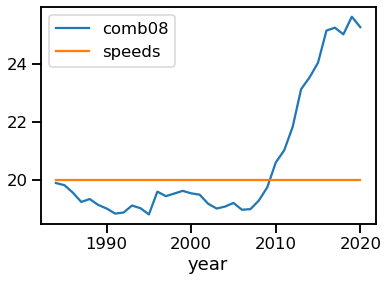

In [108]:
(autos2
    .groupby('year')
    [['comb08','speeds']]
    .mean()
    .plot()
)

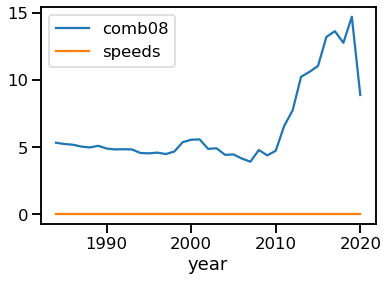

In [113]:
(autos2
    .groupby('year')
    [['comb08','speeds']]
    # .median()
    # .quantile(.1)
    .std()
    .plot()
)

In [116]:
# add country
(autos2
    .assign(country=autos2.make.apply(country))
    .groupby(['year','country'])
    .mean()
)

city08     comb08  highway08  cylinders     displ  \
year country                                                         
1984 Other    19.384615  21.417330  24.847038   4.908046  2.691406   
     US       16.079232  17.797119  20.669868   6.033613  3.808594   
1985 Other    19.284768  21.373068  24.816777   4.871965  2.636719   
     US       16.275472  18.025157  21.020126   5.949686  3.765625   
1986 Other    19.167183  21.213622  24.650155   4.804954  2.537109   
     US       15.945035  17.645390  20.464539   6.136525  3.925781   
1987 Other    18.633381  20.710414  24.186876   4.825963  2.583984   
     US       15.611722  17.326007  20.208791   6.164835  3.931641   
1988 Other    18.668224  20.814642  24.437695   4.819315  2.531250   
     US       15.577869  17.372951  20.420082   6.307377  4.066406   
...                 ...        ...        ...        ...       ...   
2016 Other    21.903749  24.439716  28.866261   5.493414  2.992188   
     US       25.061818  27.701818  32.265455   5.356364  3.277344   
2017 Other    22.423795  24.910521  29.208456   5.431662  2.919922   
     US       24.003623  26.496377  30.829710   5.532609  3.419922   
2018 Other    22.310442  24.779868  29.042333   5.396990  2.886719   
     US       23.526690  25.925267  30.145907   5.597865  3.390625   
2019 Other    23.084221  25.456922  29.560503   5.315586  2.839844   
     US       24.169014  26.250000  30.042254   5.559859  3.419922   
2020 Other    22.579487  25.174359  29.543590   5.148718  2.693359   
     US       24.071429  26.571429  30.642857   4.000000  1.978516   

               fuelCost08      range  speeds  
year country                                  
1984 Other    2118.125553   0.000000    20.0  
     US       2578.871549   0.000000    20.0  
1985 Other    2141.997792   0.000000    20.0  
     US       2553.899371   0.000000    20.0  
1986 Other    2149.148607   0.000000    20.0  
     US       2588.741135   0.000000    20.0  
1987 Other    2227.318117   0.000000    20.0  
     US       2630.036630   0.000000    20.0  
1988 Other    2207.476636   0.000000    20.0  
     US       2623.258197   0.000000    20.0  
...                   ...        ...     ...  
2016 Other    2127.608916   1.017224    20.0  
     US       1960.545455  17.214545    20.0  
2017 Other    2114.110128   1.243854    20.0  
     US       2031.884058  15.731884    20.0  
2018 Other    2121.448730   1.135466    20.0  
     US       2037.900356  12.537367    20.0  
2019 Other    2093.659245   2.581801    20.0  
     US       2093.133803  16.419014    20.0  
2020 Other    2050.256410   2.446154    20.0  
     US       1650.000000   0.000000    20.0  

[74 rows x 8 columns]

In [118]:
# can apply multiple aggregates
def second_to_last(series):
    return series.iloc[-2]

(autos2 
    .assign(country=autos2.make.apply(country))
    .groupby(['year','country'])
    .agg(['min','mean',second_to_last]))

city08                           comb08             \
                min       mean second_to_last    min       mean   
year country                                                      
1984 Other        7  19.384615             14      8  21.417330   
     US           8  16.079232             15      9  17.797119   
1985 Other        7  19.284768             19      8  21.373068   
     US           8  16.275472             14     10  18.025157   
1986 Other        6  19.167183             10      7  21.213622   
     US           9  15.945035             16     10  17.645390   
1987 Other        6  18.633381             12      7  20.710414   
     US           8  15.611722             12      9  17.326007   
1988 Other        6  18.668224             12      7  20.814642   
     US           8  15.577869             14      9  17.372951   
...             ...        ...            ...    ...        ...   
2016 Other       10  21.903749             28     12  24.439716   
     US          11  25.061818             91     12  27.701818   
2017 Other       10  22.423795             21     11  24.910521   
     US          11  24.003623            131     12  26.496377   
2018 Other        9  22.310442             11     11  24.779868   
     US          11  23.526690            120     14  25.925267   
2019 Other        9  23.084221             19     11  25.456922   
     US          11  24.169014            104     14  26.250000   
2020 Other       13  22.579487             17     15  25.174359   
     US          20  24.071429             21     22  26.571429   

                            highway08                           cylinders  \
             second_to_last       min       mean second_to_last       min   
year country                                                                
1984 Other               14         9  24.847038             15         2   
     US                  17        10  20.669868             19         4   
1985 Other               20         9  24.816777             22         0   
     US                  15        10  21.020126             17         3   
1986 Other               11         9  24.650155             12         0   
     US                  17        11  20.464539             19         3   
1987 Other               12         9  24.186876             12         2   
     US                  13        10  20.208791             14         3   
1988 Other               12        10  24.437695             12         2   
     US                  14        10  20.420082             15         3   
...                     ...       ...        ...            ...       ...   
2016 Other               30        13  28.866261             32         0   
     US                  93        16  32.265455             94         0   
2017 Other               24        11  29.208456             28         0   
     US                 126        15  30.829710            120         0   
2018 Other               12        11  29.042333             15         0   
     US                 116        15  30.145907            112         0   
2019 Other               22        14  29.560503             27         0   
     US                 104        15  30.042254            104         0   
2020 Other               20        18  29.543590             24         0   
     US                  24        26  30.642857             28         4   

              ...          displ fuelCost08                             range  \
              ... second_to_last        min         mean second_to_last   min   
year country  ...                                                               
1984 Other    ...       2.400391       1050  2118.125553           3000     0   
     US       ...       4.101562       1200  2578.871549           2500     0   
1985 Other    ...       2.000000       1000  2141.997792           2100     0   
     US       ...       3.699219       1000  2553.899371           28

In [122]:
# unstack operation
(autos2
    .assign(country=autos2.make.apply(country))
    .groupby(['year','country'])
    .mean()
    .unstack()
)

city08                comb08             highway08             \
country      Other         US      Other         US      Other         US   
year                                                                        
1984     19.384615  16.079232  21.417330  17.797119  24.847038  20.669868   
1985     19.284768  16.275472  21.373068  18.025157  24.816777  21.020126   
1986     19.167183  15.945035  21.213622  17.645390  24.650155  20.464539   
1987     18.633381  15.611722  20.710414  17.326007  24.186876  20.208791   
1988     18.668224  15.577869  20.814642  17.372951  24.437695  20.420082   

        cylinders               displ             fuelCost08               \
country     Other        US     Other        US        Other           US   
year                                                                        
1984     4.908046  6.033613  2.691406  3.808594  2118.125553  2578.871549   
1985     4.871965  5.949686  2.636719  3.765625  2141.997792  2553.899371   
1986     4.804954  6.136525  2.537109  3.925781  2149.148607  2588.741135   
1987     4.825963  6.164835  2.583984  3.931641  2227.318117  2630.036630   
1988     4.819315  6.307377  2.531250  4.066406  2207.476636  2623.258197   

        range      speeds        
country Other   US  Other    US  
year                             
1984      0.0  0.0   20.0  20.0  
1985      0.0  0.0   20.0  20.0  
1986      0.0  0.0   20.0  20.0  
1987      0.0  0.0   20.0  20.0  
1988      0.0  0.0   20.0  20.0

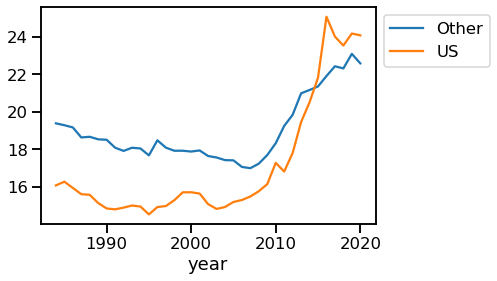

In [131]:
(autos2
    .assign(country=autos2.make.apply(country))
    .groupby(['year','country'])
    .mean()
    .unstack()
    .city08
    .plot()
    .legend(bbox_to_anchor=(1,1))
)

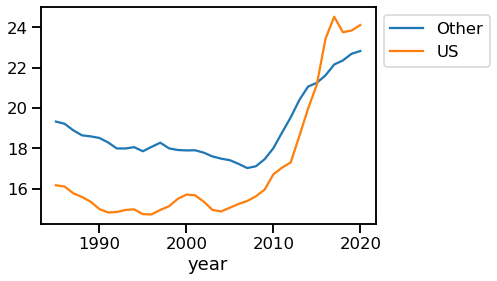

In [133]:
(autos2
    .assign(country=autos2.make.apply(country))
    .groupby(['year','country'])
    .mean()
    .unstack()
    .city08
    .rolling(2) #smooth it out
    .mean()
    .plot()
    .legend(bbox_to_anchor=(1,1))
)

In [138]:
def vals_gt(df_,num):
    return df_[df_.gt(num)].dropna()

(autos2
    .assign(country=autos2.make.apply(country))
    .groupby(['year','country'])
    .count()
    .pipe(vals_gt,700)
)

,,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,automatic,speeds,ffs
year,country,,,,,,,,,,,,,,
1984,Other,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1065.0
1985,Other,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,821.0
1991,Other,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
1992,Other,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,707.0
1993,Other,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0
2017,Other,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,766.0
2018,Other,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,844.0
2019,Other,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,855.0


## SUMMARY
- correct types save space and enable convenient math, string, and date functionality
- Chaining operations will:
    - make code readable
    - remove bugs
    - easier to debug
- dont mutate. Embrace Chaining
- `.apply` is slow for math
- Aggregations are powerful. Play with them until they make sense